# Which jobs grew in pay after adjusting for inflation from 2003 to 2018 in Louisville Ky?

To figure this out I will look at data collected from The Occupational Information Network (https://www.onetonline.org/). I will look at data collected in 5 year incremements from 2003 to 2018 and the data looked at will only be Louisville Kentucky data. 

Why not look at the highest paying jobs?
    Looking at the highest paying job does suggest that a paticular job is valued however jobs that see a continous increase in income might suggest that their is a supply that is not meeting the demand. Therefore we should see growth in the pay for that job. 

In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### I cleaned the data in the other file and this contains only the clean dataset.

In [2]:
occupation_file_name = os.path.join('new_occupation.csv')

In [3]:
occupation = pd.read_csv(occupation_file_name, index_col=0)

In [4]:
occupation["OCC_TITLE"] = occupation["OCC_TITLE"].str.lower()
pop=occupation.pop('Unnamed: 19')

In economics the term real dollars is the value of currency after being adjusted for inflation. I will turn everything into 2018 dollars and to compute the difference I used an inflation calculator which can be found in the following website 
https://www.usinflationcalculator.com/

Adjusted for inflation, 1.00 in 2003 is equal to 1.36 in 2018, with a 36.5% cumulative rate of inflation.

Adjusted for inflation, 1.00 in 2008 is equal to 1.17 in 2018, with a 16.6% cumulative rate of inflation.

Adjusted for inflation, 1.00 in 2013 is equal to 1.08 in 2018, with a 7.8% cumulative rate of inflation.

## Converting to 2018 dollars

In [5]:
#This formula converts each year to 2018 dollars, which contorls for inflation. 
occupation.columns[5:18]

for x in occupation.columns[5:18]:
    occupation.loc[(occupation.YEAR == 2013), x] *=1.08
    occupation.loc[(occupation.YEAR == 2008), x] *=1.17
    occupation.loc[(occupation.YEAR == 2003), x] *=1.36


## Checking to see how many occupations existed across all four sample years\


In [6]:
#This counts the number of instances of a specific job code. As you can see there are 389 jobs that where in all four 
#instances, 128 in three, 139 in two, and 80 in 1. 

occ_count=occupation.groupby('OCC_CODE')
occ_count_all = occ_count.size()
occ_count_all.value_counts()

4    389
2    139
3    128
1     80
dtype: int64

In [7]:
#made dictionaries that can be used to show years
total_instance=occupation.groupby(['OCC_CODE'])
total_instance=total_instance.size()
dict4={}
dict3={}
dict2={}
dict1={}
for y, x in total_instance.items():
    if x == 4:
        dict4.update({y:x})
    elif x == 3:
        dict3.update({y:x})
    elif x == 2:
        dict2.update({y:x})
    else:
        dict1.update({y:x})   

In [8]:
#I am going to create a dictionary that will allow me to organize the years.
check=(occupation.groupby(['OCC_CODE','YEAR'])).size()

#dictuionary containing each year and the years that fall in it. 
occ_yeardict={}
for y,x in check.items():
    (a,b)=y
    if a in occ_yeardict:
        t=occ_yeardict[a]
        t = t + (b,)
        occ_yeardict.update({a:t})
    else:
        occ_yeardict.update({a:(b,)})

#dictuionary containing each gaps and the length. I will not use this in this project but I am planning on using it in the future. 
dictgap={}
for x, y in occ_yeardict.items():
    z=pd.np.diff(y)
    if (len(z)>0) and ((10 in z)or(15 in z)):
        if z[0]>5:
            dictgap.update({x:(y[0:2],z[0])})
        elif z[1]>5:
            dictgap.update({x:(y[1:],z[1])})
    

In [9]:
#Determine the number of occupations with gaps
len(dictgap)

43

In [10]:
#sort values for percent change
occupation.sort_values(['YEAR', 'OCC_CODE'], ascending=[1, 1], inplace=True)

In [11]:
#create percent change for mean items
occupation['H_CHANGE'] = occupation.groupby('OCC_CODE').H_MEAN.pct_change()
occupation['A_CHANGE'] = occupation.groupby('OCC_CODE').A_MEAN.pct_change()

In [12]:
#I am using this to create new rows and then I am collecting the location for further manipulation
occupation = occupation.assign(**{'FOUR_YEAR':"False",'THREE_YEAR': "False",'TWO_YEAR': "False",'ONE_YEAR':"False",'GAP_YEAR':"False"})
y4_loc=occupation.columns.get_loc('FOUR_YEAR')
y3_loc=occupation.columns.get_loc('THREE_YEAR')
y2_loc=occupation.columns.get_loc('TWO_YEAR')
y1_loc=occupation.columns.get_loc('ONE_YEAR')
ygap_loc=occupation.columns.get_loc('GAP_YEAR')

In [13]:
# I am using this to populate the rows. 
locnumber=0
for index, row in occupation.iterrows():
    occupation.iloc[locnumber:,y4_loc] = (row['OCC_CODE'] in dict4)
    occupation.iloc[locnumber:,y3_loc] = (row['OCC_CODE'] in dict3)
    occupation.iloc[locnumber:,y2_loc] = (row['OCC_CODE'] in dict2)
    occupation.iloc[locnumber:,y1_loc] = (row['OCC_CODE'] in dict1)
    occupation.iloc[locnumber:,ygap_loc] = (row['OCC_CODE'] in dictgap)
    locnumber +=1

In [14]:
#Here is data that is just Occupation data that has each based on the different ways I sepereated them.  
occupation_4 = occupation[occupation['FOUR_YEAR'] == True]
occupation_3 = occupation[(occupation['THREE_YEAR'] == True) & (occupation['GAP_YEAR'] == False)]
occupation_2 = occupation[(occupation['TWO_YEAR'] == True) & (occupation['GAP_YEAR'] == False)]
occupation_1 = occupation[(occupation['ONE_YEAR'] == True) & (occupation['GAP_YEAR'] == False)]
occupation_gap = occupation[(occupation['GAP_YEAR'] == True) & (occupation['GAP_YEAR'] == False)]

In [15]:
occupation["OCC_TITLE"] = occupation["OCC_TITLE"].str.lower()
#occupation.loc[occupation.OCC_TITLE.isupper(), 'OCC_TITLE"] = occupation.OCC_TITLE.str.lower()
occupation[occupation["OCC_TITLE"].str.contains("econ")]

OCC_CODE                                          OCC_TITLE OCC_GROUP  \
1814  11-9032  education administrators, elementary and secon...       NaN   
1908  25-1011                   business teachers, postsecondary       NaN   
1909  25-1021           computer science teachers, postsecondary       NaN   
1910  25-1022       mathematical science teachers, postsecondary       NaN   
1911  25-1052                  chemistry teachers, postsecondary       NaN   
1912  25-1054                    physics teachers, postsecondary       NaN   
1913  25-1066                 psychology teachers, postsecondary       NaN   
1914  25-1072    nursing instructors and teachers, postsecondary       NaN   
1915  25-1121      art, drama, and music teachers, postsecondary       NaN   
1916  25-1122             communications teachers, postsecondary       NaN   
1917  25-1123  english language and literature teachers, post...       NaN   
1918  25-1126    philosophy and religion teachers, postsecondary       NaN   
1919  25-1194       vocational education teachers, postsecondary       NaN   
1923  25-2031  secondary school teachers, except special and ...       NaN   
1212  11-9032  education administrators, elementary and secon...       NaN   
1213  11-9033            education administrators, postsecondary       NaN   
1304  19-3011                                         economists       NaN   
1337  25-1011                   business teachers, postsecondary       NaN   
1338  25-1021           computer science teachers, postsecondary       NaN   
1339  25-1022       mathematical science teachers, postsecondary       NaN   
1340  25-1042         biological science teachers, postsecondary       NaN   
1341  25-1052                  chemistry teachers, postsecondary       NaN   
1342  25-1063                  economics teachers, postsecondary       NaN   
1343  25-1066                 psychology teachers, postsecondary       NaN   
1344  25-1071         health specialties teachers, postsecondary       NaN   
1345  25-1072    nursing instructors and teachers, postsecondary       NaN   
1346  25-1081                  education teachers, postsecondary       NaN   
1347  25-1111  criminal justice and law enforcement teachers,...       NaN   
1348  25-1121      art, drama, and music teachers, postsecondary       NaN   
1349  25-1122             communications teachers, postsecondary       NaN   
...       ...                                                ...       ...   
744   25-1081                  education teachers, postsecondary  detailed   
745   25-1111  criminal justice and law enforcement teachers,...  detailed   
746   25-1113                social work teachers, postsecondary  detailed   
747   25-1121      art, drama, and music teachers, postsecondary  detailed   
748   25-1122             communications teachers, postsecondary  detailed   
749   25-1123  english language and literature teachers, post...  detailed   
750   25-1124  foreign language and literature teachers, post...  detailed   
751   25-1125                    history teachers, postsecondary  detailed   
752   25-1126    philosophy and religion teachers, postsecondary  detailed   
753   25-1193  recreation and fitness studies teachers, posts...  detailed   
754   25-1194       vocational education teachers, postsecondary  detailed   
755   25-1199                  postsecondary teachers, all other  detailed   
760   25-2031  secondary school teachers, except special and ...  detailed   
763   25-2054       special education teachers, secondary school  detailed   
765   25-3011  adult basic and secondary education and litera...  detailed   
19    11-9032  education administrators, elementary and secon...  detailed   
20    11-9033            education administrators, postsecondary  detailed   
152   25-1011                   business teachers, postsecondary  detailed   
153   25-1022       mathematical science teachers, postsecondary  detailed   
154   25-1067              

### SQL STUFF

In [16]:
occupation_4=occupation_4.sort_values(by='YEAR', ascending=False)
occupation_4.to_sql("occ_table",sqlite3.connect('occ.db'), if_exists ="replace")

In [17]:
con = sqlite3.connect("occ.db")

In [34]:
#This is sorting the data by the average hourly percent change. Where those with the highest percent change fairing better.   
highest_h_ave= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, H_MEAN, AVG(H_CHANGE) as H_Change_Average, YEAR FROM occ_table GROUP BY OCC_CODE ORDER BY H_Change_Average DESC LIMIT 10", con)
highest_h_ave

OCC_CODE                                          OCC_TITLE  H_MEAN  \
0  27-2012                            producers and directors   33.33   
1  11-9061                           funeral service managers   44.18   
2  49-9098  helpers--installation, maintenance, and repair...   22.24   
3  19-4091  environmental science and protection technicia...   29.54   
4  11-2011                advertising and promotions managers   53.04   
5  11-3061                                purchasing managers   60.24   
6  29-1066                                      psychiatrists   90.79   
7  39-9032                                 recreation workers   18.48   
8  13-2082                                      tax preparers   22.59   
9  27-4032                             film and video editors     NaN   

   H_Change_Average  YEAR  
0          0.134717  2018  
1          0.109731  2018  
2          0.080048  2018  
3          0.042304  2018  
4          0.040898  2018  
5          0.039929  2018  
6          0.036577  2018  
7          0.031287  2018  
8          0.029210  2018  
9          0.021536  2018

OCC_CODE
11-2011    AxesSubplot(0.125,0.125;0.775x0.755)
11-3061    AxesSubplot(0.125,0.125;0.775x0.755)
11-9061    AxesSubplot(0.125,0.125;0.775x0.755)
13-2082    AxesSubplot(0.125,0.125;0.775x0.755)
19-4091    AxesSubplot(0.125,0.125;0.775x0.755)
27-2012    AxesSubplot(0.125,0.125;0.775x0.755)
27-4032    AxesSubplot(0.125,0.125;0.775x0.755)
29-1066    AxesSubplot(0.125,0.125;0.775x0.755)
39-9032    AxesSubplot(0.125,0.125;0.775x0.755)
49-9098    AxesSubplot(0.125,0.125;0.775x0.755)
Name: H_MEAN, dtype: object

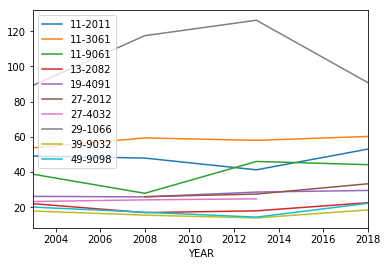

In [20]:
highest_h_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,H_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('27-2012','11-9061','49-9098','19-4091','11-2011','11-3061','29-1066','39-9032','13-2082','27-4032')", con)
highest_h_mean.set_index('YEAR', inplace=True)
highest_h_mean.groupby('OCC_CODE')['H_MEAN'].plot(legend=True)

In [21]:
highest_h_mean

OCC_CODE                                          OCC_TITLE      H_MEAN
YEAR                                                                        
2018  29-1066                                      psychiatrists   90.790000
2018  27-2012                            producers and directors   33.330000
2018  27-4032                             film and video editors         NaN
2018  13-2082                                      tax preparers   22.590000
2018  11-2011                advertising and promotions managers   53.040000
2018  11-3061                                purchasing managers   60.240000
2018  11-9061                           funeral service managers   44.180000
2018  19-4091  environmental science and protection technicia...   29.540000
2018  49-9098  helpers--installation, maintenance, and repair...   22.240000
2018  39-9032                                 recreation workers   18.480000
2013  29-1066                                      psychiatrists  126.274464
2013  27-2012                            producers and directors   27.480384
2013  27-4032                             film and video editors   24.774336
2013  13-2082                                      tax preparers   17.950896
2013  11-3061                                purchasing managers   58.005072
2013  11-2011                advertising and promotions managers   41.267232
2013  11-9061                           funeral service managers   46.026144
2013  19-4091  environmental science and protection technicia...   28.623456
2013  49-9098  helpers--installation, maintenance, and repair...   14.370048
2013  39-9032                                 recreation workers   13.926816
2008  29-1066                                      psychiatrists  117.492687
2008  27-2012                            producers and directors   26.009100
2008  27-4032                             film and video editors   24.188463
2008  13-2082                                      tax preparers   16.946982
2008  11-2011                advertising and promotions managers   47.938878
2008  11-3061                                purchasing managers   59.396571
2008  11-9061                                  funeral directors   27.911871
2008  19-4091  environmental science and protection technicia...   25.872210
2008  49-9098  helpers--installation, maintenance, and repair...   17.138628
2008  39-9032                                 recreation workers   15.495948
2003  29-1066                                      psychiatrists   89.280192
2003  27-2012                            producers and directors         NaN
2003  27-4032                             film and video editors   23.249472
2003  13-2082                                      tax preparers   22.010240
2003  11-2011                advertising and promotions managers   49.088384
2003  11-3061                                purchasing managers   53.767872
2003  11-9061                                  funeral directors   38.749120
2003  19-4091  environmental science and protection technicia...   26.171840
2003  49-9098  helpers--installation, maintenance, and repair...   20.068160
2003  39-9032                                 recreation workers   17.848640

In [22]:
#offset it to avoid na data
lowest_h_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,AVG(H_CHANGE) as H_average FROM occ_table GROUP BY OCC_CODE ORDER BY H_average ASC LIMIT 10 OFFSET 12", con)
lowest_h_ave

OCC_CODE                                          OCC_TITLE  H_average
0  29-1011                                      chiropractors  -0.242064
1  13-1121            meeting, convention, and event planners  -0.225118
2  13-2021            appraisers and assessors of real estate  -0.220821
3  51-3091  food and tobacco roasting, baking, and drying ...  -0.190703
4  17-3025              environmental engineering technicians  -0.180274
5  51-4023  rolling machine setters, operators, and tender...  -0.179433
6  53-7021                          crane and tower operators  -0.168824
7  49-3022          automotive glass installers and repairers  -0.168186
8  25-1194       vocational education teachers, postsecondary  -0.167822
9  51-4122  welding, soldering, and brazing machine setter...  -0.161642

OCC_CODE
13-1121    AxesSubplot(0.125,0.125;0.775x0.755)
13-2021    AxesSubplot(0.125,0.125;0.775x0.755)
17-3025    AxesSubplot(0.125,0.125;0.775x0.755)
25-1194    AxesSubplot(0.125,0.125;0.775x0.755)
29-1011    AxesSubplot(0.125,0.125;0.775x0.755)
49-3022    AxesSubplot(0.125,0.125;0.775x0.755)
51-3091    AxesSubplot(0.125,0.125;0.775x0.755)
51-4023    AxesSubplot(0.125,0.125;0.775x0.755)
51-4122    AxesSubplot(0.125,0.125;0.775x0.755)
53-7021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: H_MEAN, dtype: object

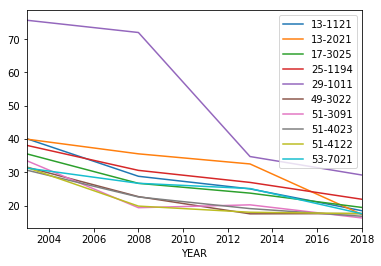

In [23]:
lowest_h_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,H_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('29-1011','13-1121','13-2021','51-3091','17-3025','51-4023','53-7021','49-3022','25-1194','51-4122')", con)
lowest_h_mean.set_index('YEAR', inplace=True)
lowest_h_mean.groupby('OCC_CODE')['H_MEAN'].plot(legend=True)

In [24]:
#This is sorting the data by the average annual percent change. Where those with the highest percent change fairing better.   
highest_a_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, AVG(A_CHANGE) as A_average FROM occ_table GROUP BY OCC_CODE ORDER BY A_average DESC LIMIT 10", con)
highest_a_ave

OCC_CODE                                          OCC_TITLE  A_average
0  11-9061                           funeral service managers   0.109700
1  25-1121      art, drama, and music teachers, postsecondary   0.082466
2  49-9098  helpers--installation, maintenance, and repair...   0.079867
3  53-2012                                  commercial pilots   0.049790
4  19-4091  environmental science and protection technicia...   0.042487
5  11-2011                advertising and promotions managers   0.040891
6  11-3061                                purchasing managers   0.039937
7  29-1066                                      psychiatrists   0.036582
8  39-9032                                 recreation workers   0.031165
9  13-2082                                      tax preparers   0.029084

OCC_CODE
11-2011    AxesSubplot(0.125,0.125;0.775x0.755)
11-3061    AxesSubplot(0.125,0.125;0.775x0.755)
11-9061    AxesSubplot(0.125,0.125;0.775x0.755)
13-2082    AxesSubplot(0.125,0.125;0.775x0.755)
19-4091    AxesSubplot(0.125,0.125;0.775x0.755)
25-1121    AxesSubplot(0.125,0.125;0.775x0.755)
29-1066    AxesSubplot(0.125,0.125;0.775x0.755)
39-9032    AxesSubplot(0.125,0.125;0.775x0.755)
49-9098    AxesSubplot(0.125,0.125;0.775x0.755)
53-2012    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A_MEAN, dtype: object

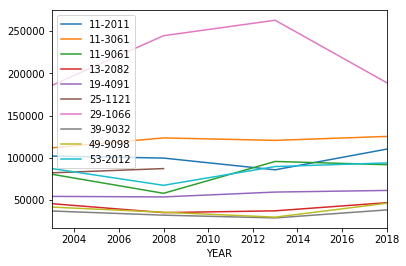

In [25]:
highest_a_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,A_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('11-9061','25-1121','49-9098','53-2012','19-4091','11-2011','11-3061','29-1066','39-9032','13-2082')", con)
highest_a_mean.set_index('YEAR', inplace=True)
highest_a_mean.groupby('OCC_CODE')['A_MEAN'].plot(legend=True)

In [26]:
#This is sorting the data by the average annual percent change. Where those with the lowest percent change fairing better.   
lowest_a_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, AVG(A_CHANGE) as A_average FROM occ_table GROUP BY OCC_CODE ORDER BY A_average ASC LIMIT 10", con)
lowest_a_ave

OCC_CODE                                          OCC_TITLE  A_average
0  29-1011                                      chiropractors  -0.242086
1  13-1121            meeting, convention, and event planners  -0.225118
2  13-2021            appraisers and assessors of real estate  -0.220818
3  29-9091                                  athletic trainers  -0.192253
4  51-3091  food and tobacco roasting, baking, and drying ...  -0.190689
5  17-3025              environmental engineering technicians  -0.180318
6  51-4023  rolling machine setters, operators, and tender...  -0.179492
7  53-7021                          crane and tower operators  -0.168827
8  49-3022          automotive glass installers and repairers  -0.168263
9  25-1194       vocational education teachers, postsecondary  -0.167853

OCC_CODE
13-1121    AxesSubplot(0.125,0.125;0.775x0.755)
13-2021    AxesSubplot(0.125,0.125;0.775x0.755)
17-3025    AxesSubplot(0.125,0.125;0.775x0.755)
25-1194    AxesSubplot(0.125,0.125;0.775x0.755)
29-1011    AxesSubplot(0.125,0.125;0.775x0.755)
29-9091    AxesSubplot(0.125,0.125;0.775x0.755)
49-3022    AxesSubplot(0.125,0.125;0.775x0.755)
51-3091    AxesSubplot(0.125,0.125;0.775x0.755)
51-4023    AxesSubplot(0.125,0.125;0.775x0.755)
53-7021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A_MEAN, dtype: object

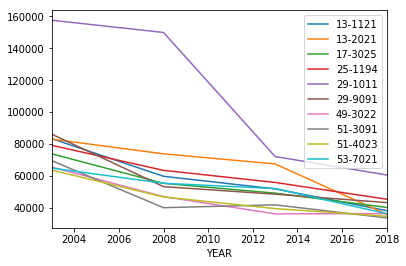

In [27]:
lowest_a_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,A_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('29-1011','13-1121','13-2021','29-9091','51-3091','17-3025','51-4023','53-7021','49-3022','25-1194')", con)
lowest_a_mean.set_index('YEAR', inplace=True)
lowest_a_mean.groupby('OCC_CODE')['A_MEAN'].plot(legend=True)